Martín Lara

In [2]:
#importar datos desde Cuestionario motivacion academica.csv
import pandas as pd
import string

df = pd.read_csv('Cuestionario motivacion academica.csv')

In [3]:
try:
    # Imprimir las columnas de forma enumerada para facilitar la selección y lectura
    print("Columnas en el archivo 'Cuestionario motivacion academica.csv':")
    for i, col in enumerate(df.columns, 1):
        print(f"{i}. {col}")

except FileNotFoundError:
    print("Error: No se encontró el archivo 'Cuestionario motivacion academica.csv' en el directorio.")

# Asignamos una variable para cada columna del dF, formato col_{número de columna}:
for i, col in enumerate(df.columns, 1):
    var_name = f"col_{i}"
    globals()[var_name] = col

# Ahora podemos usar las variables col_1, col_2, etc. para acceder a las columnas del DataFrame facilmente 
# (guiandonos con el número de columna de la lista impresa anteriormente)


Columnas en el archivo 'Cuestionario motivacion academica.csv':
1. Carrera que estudias actualmente
2. Ciudad de origen (desde dónde te viniste a la universidad)
3. Año en que te matriculaste
4. Género
5. Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0
6. Indica tu nivel actual de motivación por estudiar tu carrera
7. Indica, en general, qué tan 4 asistes a clases
8. Indica, en general, qué tan activamente participas en clases (Ejemplo: Preguntar, comentar, dar ideas, colaborar con compañeros, entre otros).
9.  [Me considero lo suficientemente capacitado/a para enfrentarme con éxito a tareas académicas desafiantes]
10.  [Pienso que tengo bastante capacidad para comprender bien y con rapidez contenidos académicos desafiantes]
11.  [Me siento con confianza para abordar situaciones que ponen a prueba mi capacidad académica]
12.  [Tengo la convicción que puedo obtener excelentes notas en las pruebas desafiantes]
13.  [

In [ ]:
# Esto te mostrará una lista de todos los valores únicos en la columna
print(df['Ciudad de origen (desde dónde te viniste a la universidad)'].unique())
# Detectamos que hay espacios en blanco al inicio y al final de los nombres de las ciudades

['San pedro de la Paz' 'Temuco' 'Collipulli' 'Cauquenes' 'Magallanes'
 'Cañete' 'Santiago' 'Chillán' 'Antofagasta ' 'Chillán ' 'Traiguén'
 'Puerto Varas' 'Concepción ' 'Ñiquen' 'Castro' 'Quellón' 'Bulnes'
 'San Carlos' 'Coronel' 'Laja' 'Penco' 'San Fernando ' 'Renaico ' 'Talca '
 'Ancud ' 'Los Ángeles ' 'Cañete ' 'Angol' 'Lonquimay' 'Quirihue'
 'Linares' 'Yumbel' 'Puerto Montt' 'Lota' 'Talcahuano' 'Curacautín'
 'Coelemu ' 'Florida ' 'Tomé ' 'Chonchi' 'Calama' 'Constitución '
 'Coelemu' 'Arica y Parinacota ' 'Penco ' 'Dalcahue' 'Chiguayante '
 'Hualpén' 'Florida' 'Curicó ' 'Antuco' 'Hualqui' 'Santa Juana '
 'Puerto Montt ' 'Santa Bárbara ' 'Parral ' 'San Javier' 'San Fabián'
 'Mulchén ' 'Chiguayante' 'Quillón' 'Talcahuano ' 'Cabrero' 'Curanilahue'
 'Coyanco' 'Ancud' 'Contulmo ' 'La Serena' 'Puerto Aysen' 'Puerto montt'
 'Arauco ' 'Hualqui ' 'Antofagasta' 'Santa Juana' 'Lebu' 'Coronel '
 'Osorno' 'San Pedro de la Costa ' 'Coyhaique ' 'Nacimiento '
 'Constitución' 'Cabrero ' 'Parral' 'Buc

In [5]:
# Para sortear lo anterior, filtramos eliminando los espacios en blanco:
# df[nombre_columna].str.strip() crea una versión temporal de la columna sin espacios.
# Esa versión temporal se compara con 'Concepción'.
# El resultado (una serie de True/False) se usa para filtrar el df original.
# El DataFrame 'df' no se modifica en el proceso.
filtro_ciudad = df[df['Ciudad de origen (desde dónde te viniste a la universidad)'].str.strip() != 'Concepción']

# Para demostrar que el DataFrame original no ha cambiado,
# podemos buscar una fila que antes no se filtraba.
# Por ejemplo, si había una fila con " Concepción " (con espacios),
# todavía existirá en el 'df' original.
print("\nVerificación en el DataFrame Original")
print("¿Sigue existiendo 'Concepción ' en el df original?", ('Concepción ' in df['Ciudad de origen (desde dónde te viniste a la universidad)'].unique()))


Verificación en el DataFrame Original
¿Sigue existiendo 'Concepción ' en el df original? True


In [6]:
# Ahora en base al filtro_ciudad podemos hacer análisis sin considerar Concepción, por ejemplo:
print("\nAnálisis sin considerar 'Concepción'")
print("Número de filas después de filtrar 'Concepción':", len(filtro_ciudad))

# Lo comparamos con el df original
print("Número de filas en el DataFrame original:", len(df))

# Sacamos su diferencia
print("Número de filas filtradas (diferencia):", len(df) - len(filtro_ciudad))

# Así podemos ver que 1058 alumnos son foraneos estudiando en Concepción (UDEC)
# y podemos hacer análisis considerarndo sólo a esos alumnos y ver el impacto que tiene
# ser foraneo en la motivación académica y posibles dificultades.


Análisis sin considerar 'Concepción'
Número de filas después de filtrar 'Concepción': 1058
Número de filas en el DataFrame original: 1460
Número de filas filtradas (diferencia): 402


In [7]:
# Realicemos un conteo de cuántos estudiantes entraron por generación (desde filtro_ciudad).
# Primero vemos los limites inferior y superior de la columna 3 "Año en que te matriculaste",
# filtrando que los strings no contengan espacios ni letras (evitando valores nulos o erróneos,
# consideramos que hay respuestas como 'Antes de 2015').
allLetters = string.ascii_letters
valores_ano = filtro_ciudad['Año en que te matriculaste'].str.strip(allLetters + ' ')
valores_ano = valores_ano[valores_ano.str.isdigit()].astype(int)
ano_min = valores_ano.min()
ano_max = valores_ano.max()
print(f"\nLímites de la columna 'Año en que te matriculaste': {ano_min} a {ano_max}")

# Ahora hacemos el conteo por generación
conteo_generacion = {}
for ano in range(ano_min, ano_max + 1):
    conteo = len(filtro_ciudad[filtro_ciudad['Año en que te matriculaste'].str.strip(allLetters + ' ') == str(ano)])
    conteo_generacion[ano] = conteo

print("\nConteo de estudiantes por generación (sin considerar 'Concepción'):")
for ano, conteo in conteo_generacion.items():
    print(f"Año {ano}: {conteo} estudiantes")

# Sumemos el conteo total de estudiantes foráneos
total_foraneos = sum(conteo_generacion.values())
print(f"\nTotal de estudiantes foráneos (sin considerar 'Concepción'): {total_foraneos}")

# Coincide con la diferencia de filas calculada anteriormente.


Límites de la columna 'Año en que te matriculaste': 2015 a 2025

Conteo de estudiantes por generación (sin considerar 'Concepción'):
Año 2015: 3 estudiantes
Año 2016: 10 estudiantes
Año 2017: 0 estudiantes
Año 2018: 0 estudiantes
Año 2019: 21 estudiantes
Año 2020: 31 estudiantes
Año 2021: 168 estudiantes
Año 2022: 128 estudiantes
Año 2023: 151 estudiantes
Año 2024: 139 estudiantes
Año 2025: 407 estudiantes

Total de estudiantes foráneos (sin considerar 'Concepción'): 1058


In [ ]:
# Ahora analizamos la columna 5 col_5: "Cantidad de ramos reprobados
# desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0"
# Usando el DataFrame filtro_ciudad y la variable col_5, considerando que los datos ya son números enteros.
# Realizamos el analisis descriptivo básico:
reprobados = filtro_ciudad[col_5].dropna().astype(int)
print("\nAnálisis descriptivo de la columna 'Cantidad de ramos reprobados':")
print(f"Promedio de ramos reprobados: {reprobados.mean():.2f}")
print(f"Mediana de ramos reprobados: {reprobados.median()}")
print(f"Desviación estándar de ramos reprobados: {reprobados.std():.2f}")
print(f"Mínimo de ramos reprobados: {reprobados.min()}")
print(f"Máximo de ramos reprobados: {reprobados.max()}")
# Realizamos el conteo de ramos reprobados = 0
conteo_cero_reprobados = (reprobados == 0).sum()
print(f"Número de estudiantes foráneos que no han reprobado ningún ramo: {conteo_cero_reprobados}")


Análisis descriptivo de la columna 'Cantidad de ramos reprobados':
Promedio de ramos reprobados: 1.59
Mediana de ramos reprobados: 0.0
Desviación estándar de ramos reprobados: 2.31
Mínimo de ramos reprobados: 0
Máximo de ramos reprobados: 14
Número de estudiantes que no han reprobado ningún ramo: 566


In [ ]:
# Ahora realizamos una nueva df en base a la original, pero considerando sólo a los estudiantes
# de Concepción (ciudad de origen).
filtro_concepcion = df[df[col_2].str.strip(' ') == 'Concepción']
# print(filtro_concepcion.head())

# buscamos la cantidad de estudiantes de Concepción
total_concepcion = len(filtro_concepcion)
print(f"\nTotal de estudiantes de Concepción: {total_concepcion}")

# Obtenemos las descriptivas de ramos reprobados para estudiantes de Concepción
reprobados_concepcion = filtro_concepcion[col_5].dropna().astype(int)
print("\nAnálisis descriptivo de la columna 'Cantidad de ramos reprobados' para estudiantes de Concepción:")
print(f"Promedio de ramos reprobados: {reprobados_concepcion.mean():.2f}")
print(f"Mediana de ramos reprobados: {reprobados_concepcion.median()}")
print(f"Desviación estándar de ramos reprobados: {reprobados_concepcion.std():.2f}")
print(f"Mínimo de ramos reprobados: {reprobados_concepcion.min()}")
print(f"Máximo de ramos reprobados: {reprobados_concepcion.max()}")
# Realizamos el conteo de ramos reprobados = 0
conteo_cero_reprobados_concepcion = (reprobados_concepcion == 0).sum()
print(f"Número de estudiantes de Concepción que no han reprobado ningún ramo: {conteo_cero_reprobados_concepcion}")

# Obtenemos el porcentaje de estudiantes que no han reprobado ningun ramo para ambos grupos
porcentaje_cero_reprobados_foraneos = (conteo_cero_reprobados / total_foraneos) * 100
porcentaje_cero_reprobados_concepcion = (conteo_cero_reprobados_concepcion / total_concepcion) * 100
print(f"\nPorcentaje de estudiantes foráneos que no han reprobado ningún ramo: {porcentaje_cero_reprobados_foraneos:.2f}%")
print(f"Porcentaje de estudiantes de Concepción que no han reprobado ningún ramo: {porcentaje_cero_reprobados_concepcion:.2f}%")

#obtenemos el rango de ramos reprobados para ambos grupos
rango_reprobados_foraneos = reprobados.max() - reprobados.min()
rango_reprobados_concepcion = reprobados_concepcion.max() - reprobados_concepcion.min()
print(f"\nRango de ramos reprobados para estudiantes foráneos: {rango_reprobados_foraneos}")
print(f"Rango de ramos reprobados para estudiantes de Concepción: {rango_reprobados_concepcion}")

# Realizamos un conteo para cada grupo de estudiantes y ver cuántos han reprobado más de 3 ramos
conteo_mas_de_3_foraneos = (reprobados > 3).sum()
conteo_mas_de_3_concepcion = (reprobados_concepcion > 3).sum()
print(f"\nNúmero de estudiantes foráneos que han reprobado más de 3 ramos: {conteo_mas_de_3_foraneos}")
print(f"Número de estudiantes de Concepción que han reprobado más de 3 ramos: {conteo_mas_de_3_concepcion}")

# Sacamos la proporción de estudiantes que han reprobado más de 3 ramos en cada grupo
proporcion_mas_de_3_foraneos = (conteo_mas_de_3_foraneos / total_foraneos) * 100
proporcion_mas_de_3_concepcion = (conteo_mas_de_3_concepcion / total_concepcion) * 100
print(f"\nProporción de estudiantes foráneos que han reprobado más de 3 ramos: {proporcion_mas_de_3_foraneos:.2f}%")
print(f"Proporción de estudiantes de Concepción que han reprobado más de 3 ramos: {proporcion_mas_de_3_concepcion:.2f}%")

# Realizamos el conteo de estudiantes que han reprobado entre 1 y 3 ramos en cada grupo
conteo_entre_1_y_3_foraneos = ((reprobados >= 1) & (reprobados <= 3)).sum()
conteo_entre_1_y_3_concepcion = ((reprobados_concepcion >= 1) & (reprobados_concepcion <= 3)).sum()
print(f"\nNúmero de estudiantes foráneos que han reprobado entre 1 y 3 ramos: {conteo_entre_1_y_3_foraneos}")
print(f"Número de estudiantes de Concepción que han reprobado entre 1 y 3 ramos: {conteo_entre_1_y_3_concepcion}")

# Sacamos la proporción de estudiantes que han reprobado entre 1 y 3 ramos en cada grupo
proporcion_entre_1_y_3_foraneos = (conteo_entre_1_y_3_foraneos / total_foraneos) * 100
proporcion_entre_1_y_3_concepcion = (conteo_entre_1_y_3_concepcion / total_concepcion) * 100
print(f"\nProporción de estudiantes foráneos que han reprobado entre 1 y 3 ramos: {proporcion_entre_1_y_3_foraneos:.2f}%")
print(f"Proporción de estudiantes de Concepción que han reprobado entre 1 y 3 ramos: {proporcion_entre_1_y_3_concepcion:.2f}%")


Total de estudiantes de Concepción: 402

Análisis descriptivo de la columna 'Cantidad de ramos reprobados' para estudiantes de Concepción:
Promedio de ramos reprobados: 1.40
Mediana de ramos reprobados: 0.0
Desviación estándar de ramos reprobados: 2.17
Mínimo de ramos reprobados: 0
Máximo de ramos reprobados: 10
Número de estudiantes de Concepción que no han reprobado ningún ramo: 233

Porcentaje de estudiantes foráneos que no han reprobado ningún ramo: 53.50%
Porcentaje de estudiantes de Concepción que no han reprobado ningún ramo: 57.96%

Rango de ramos reprobados para estudiantes foráneos: 14
Rango de ramos reprobados para estudiantes de Concepción: 10

Número de estudiantes foráneos que han reprobado más de 3 ramos: 192
Número de estudiantes de Concepción que han reprobado más de 3 ramos: 67

Proporción de estudiantes foráneos que han reprobado más de 3 ramos: 18.15%
Proporción de estudiantes de Concepción que han reprobado más de 3 ramos: 16.67%

Número de estudiantes foráneos qu

In [36]:
# Vemos si existe alguna correlación entre la cantidad de ramos reprobados y el año de ingreso a la universidad
import numpy as np
ano_ingreso = filtro_ciudad['Año en que te matriculaste'].str.strip(allLetters + ' ').astype(int)
ramos_reprobados = filtro_ciudad[col_5].dropna().astype(int)
correlacion = np.corrcoef(ano_ingreso, ramos_reprobados)[0, 1]
print(f"\nCorrelación entre año de ingreso y cantidad de ramos reprobados (estudiantes foráneos): {correlacion:.2f}")
# Una correlación negativa indicaría que los estudiantes que ingresaron en años más recientes tienden a reprobar menos ramos,
# mientras que una correlación positiva indicaría lo contrario.
# Ahora podemos hacer el mismo análisis para los estudiantes de Concepción
ano_ingreso_concepcion = filtro_concepcion['Año en que te matriculaste'].str.strip(allLetters + ' ').astype(int)
ramos_reprobados_concepcion = filtro_concepcion[col_5].dropna().astype(int)
correlacion_concepcion = np.corrcoef(ano_ingreso_concepcion, ramos_reprobados_concepcion)[0, 1]
print(f"Correlación entre año de ingreso y cantidad de ramos reprobados (estudiantes de Concepción): {correlacion_concepcion:.2f}")
# Ambos son negativos pero el de estudiantes foráneos es más cercano a 0, indicando una correlación más débil.


Correlación entre año de ingreso y cantidad de ramos reprobados (estudiantes foráneos): -0.54
Correlación entre año de ingreso y cantidad de ramos reprobados (estudiantes de Concepción): -0.59


In [37]:
# Realizamos la prueba de chi-cuadrado para ver si hay una diferencia significativa en la distribución de ramos reprobados
# entre estudiantes foráneos y de Concepción, creando un sólo data frame para realizar la tabla, para así evitar problemas de tamaño muestral.
from scipy.stats import chi2_contingency
# Creamos una tabla de contingencia
tabla_contingencia = pd.crosstab(
    pd.cut(df[col_5].dropna().astype(int), bins=[-1, 0, 3, df[col_5].max()], labels=['0 ramos', '1-3 ramos', '>3 ramos']),
    df[col_2].str.strip(' ').apply(lambda x: 'Foráneo' if x != 'Concepción' else 'Concepción')
)
# Realizamos la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"\nResultados de la prueba de chi-cuadrado:")
print(f"Chi-cuadrado: {chi2:.2f}")
print(f"p-valor: {p:.4f}")
# Un p-valor menor a 0.05 indicaría una diferencia significativa en la distribución, por lo que rechazamos la hipótesis nula.
if p < 0.05:
    print("Hay una diferencia significativa en la distribución de ramos reprobados entre estudiantes foráneos y de Concepción.")
else:
    print("No hay una diferencia significativa en la distribución de ramos reprobados entre estudiantes foráneos y de Concepción.")


Resultados de la prueba de chi-cuadrado:
Chi-cuadrado: 2.36
p-valor: 0.3071
No hay una diferencia significativa en la distribución de ramos reprobados entre estudiantes foráneos y de Concepción.


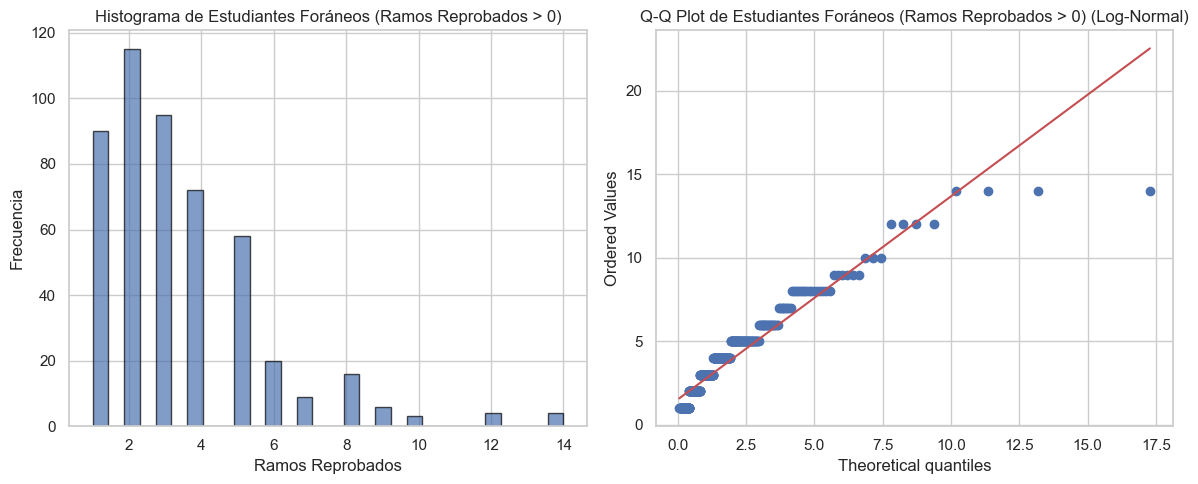

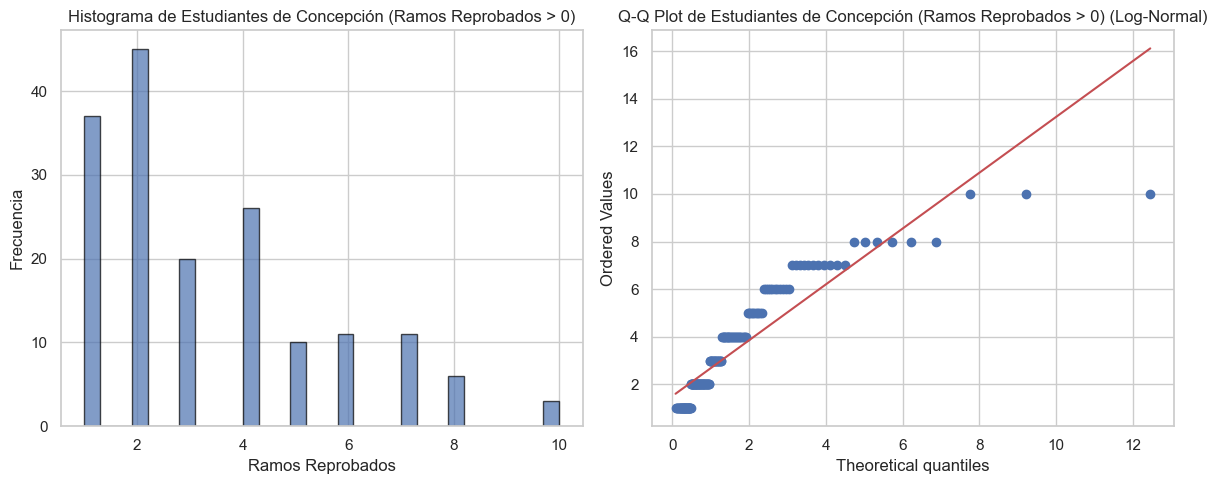


Sesgo de la distribución de ramos reprobados para estudiantes foráneos: 1.91
Sesgo de la distribución de ramos reprobados para estudiantes de Concepción: 1.71
Curtosis de la distribución de ramos reprobados para estudiantes foráneos: 4.66
Curtosis de la distribución de ramos reprobados para estudiantes de Concepción: 2.35


In [ ]:
# Probamos ver si la distribución es log-normal en ambos grupos evitando las respuestas 0. Esta prueba, entonces,
# se realiza sólo con los estudiantes que han reprobado al menos un ramo. Esto es posible debido a que la
# proporción de foraneos que no han reprobado ningún ramo es similar a la de estudiantes de Concepción.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# Función para graficar histograma y Q-Q plot
def graficar_datos(data, titulo):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {titulo}')
    plt.xlabel('Ramos Reprobados')
    plt.ylabel('Frecuencia')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="lognorm", sparams=(0.954, 0, 1), plot=plt)
    plt.title(f'Q-Q Plot de {titulo} (Log-Normal)')

    plt.tight_layout()
    plt.show()
# Filtramos datos mayores a 0
reprobados_foraneos_mayores_cero = reprobados[reprobados > 0]
reprobados_concepcion_mayores_cero = reprobados_concepcion[reprobados_concepcion > 0]
# Graficamos ambos grupos
graficar_datos(reprobados_foraneos_mayores_cero, 'Estudiantes Foráneos (Ramos Reprobados > 0)')
graficar_datos(reprobados_concepcion_mayores_cero, 'Estudiantes de Concepción (Ramos Reprobados > 0)')

# Vemos si los datos están sesgados en alguno de los dos grupos
skewness_foraneos = reprobados.skew()
skewness_concepcion = reprobados_concepcion.skew()
print(f"\nSesgo de la distribución de ramos reprobados para estudiantes foráneos: {skewness_foraneos:.2f}")
print(f"Sesgo de la distribución de ramos reprobados para estudiantes de Concepción: {skewness_concepcion:.2f}")
# Los datos están positivamente sesgados en ambos grupos, pero más en el grupo de estudiantes foráneos.

#Vemos la curtosis de ambos grupos
kurtosis_foraneos = reprobados.kurtosis()
kurtosis_concepcion = reprobados_concepcion.kurtosis()
print(f"Curtosis de la distribución de ramos reprobados para estudiantes foráneos: {kurtosis_foraneos:.2f}")
print(f"Curtosis de la distribución de ramos reprobados para estudiantes de Concepción: {kurtosis_concepcion:.2f}")
# Ambos grupos muestran una curtosis positiva, indicando colas más pesadas que una distribución normal.

Observamos que la tendencia de los datos se asemeja a una distribución log-normal en ambos grupos,
pero con una desviación significativa en los valores más altos (colas de la distribución).
Esto sugiere que aunque la mayoría de los estudiantes tienden a reprobar pocos ramos,
hay un pequeño grupo que reproba muchos más, lo que afecta la forma de la distribución.
Pero en general, ambos grupos muestran un comportamiento similar en cuanto a la distribución,
lo que podría indicar que factores similares afectan el rendimiento académico en términos de ramos reprobados,
independientemente de si los estudiantes son foráneos o locales.

Este análisis nos permite entender que el rendimiento académico no varía drásticamente entre estudiantes foráneos y locales,
al menos en términos de ramos reprobados, aunque las circunstancias individuales pueden diferir.

In [86]:
# Cambiaremos nuestro enfoque para analizar cómo la motivación académica varía entre estudiantes foráneos y locales.
# Para ello, analizaremos las respuestas a las preguntas relacionadas con la motivación académica en el cuestionario.
# Identificamos las columnas relacionadas con la motivación académica. Estas son las columnas 6 a 8.
columnas_motivacion = [col_6, col_7, col_8]
# Creamos un nuevo DataFrame que solo contenga las columnas de motivación y el origen del estudiante
df_motivacion = df[[col_2] + columnas_motivacion].copy()
# Ahora podemos analizar cómo varían las respuestas de motivación académica entre estudiantes foráneos y locales.
# Por ejemplo, podemos calcular el promedio de cada pregunta de motivación para ambos grupos
promedios_motivacion = {}
for col in columnas_motivacion:
    promedios_foraneos = df_motivacion[df_motivacion[col_2].str.strip(' ') != 'Concepción'][col].dropna().astype(float).mean()
    promedios_concepcion = df_motivacion[df_motivacion[col_2].str.strip(' ') == 'Concepción'][col].dropna().astype(float).mean()
    promedios_motivacion[col] = {
        'Foráneos': promedios_foraneos,
        'Concepción': promedios_concepcion
    }
# Imprimimos los resultados
print("\nPromedios de motivación académica por grupo:")
i = 6
for col, promedios in promedios_motivacion.items():
    print(f"Pregunta {i}: Foráneos = {promedios['Foráneos']:.2f}, Concepción = {promedios['Concepción']:.2f}")
    i += 1

# Podemos realizar pruebas estadísticas para ver si las diferencias en motivación son significativas
from scipy.stats import ttest_ind
i = 6
for col in columnas_motivacion:
    motivacion_foraneos = df_motivacion[df_motivacion[col_2].str.strip(' ') != 'Concepción'][col].dropna().astype(float)
    motivacion_concepcion = df_motivacion[df_motivacion[col_2].str.strip(' ') == 'Concepción'][col].dropna().astype(float)
    t_stat, p_val = ttest_ind(motivacion_foraneos, motivacion_concepcion, equal_var=False)
    print(f"\nPrueba t para {i}:")
    print(f"t-statistic: {t_stat:.2f}, p-valor: {p_val:.4f}")
    if p_val < 0.05:
        print(f"Diferencia significativa en la motivación académica entre estudiantes foráneos y de Concepción.")
    i += 1


Promedios de motivación académica por grupo:
Pregunta 6: Foráneos = 3.63, Concepción = 3.51
Pregunta 7: Foráneos = 4.33, Concepción = 4.49
Pregunta 8: Foráneos = 2.74, Concepción = 2.79

Prueba t para 6:
t-statistic: 2.27, p-valor: 0.0232
Diferencia significativa en la motivación académica entre estudiantes foráneos y de Concepción.

Prueba t para 7:
t-statistic: -3.87, p-valor: 0.0001
Diferencia significativa en la motivación académica entre estudiantes foráneos y de Concepción.

Prueba t para 8:
t-statistic: -0.90, p-valor: 0.3710


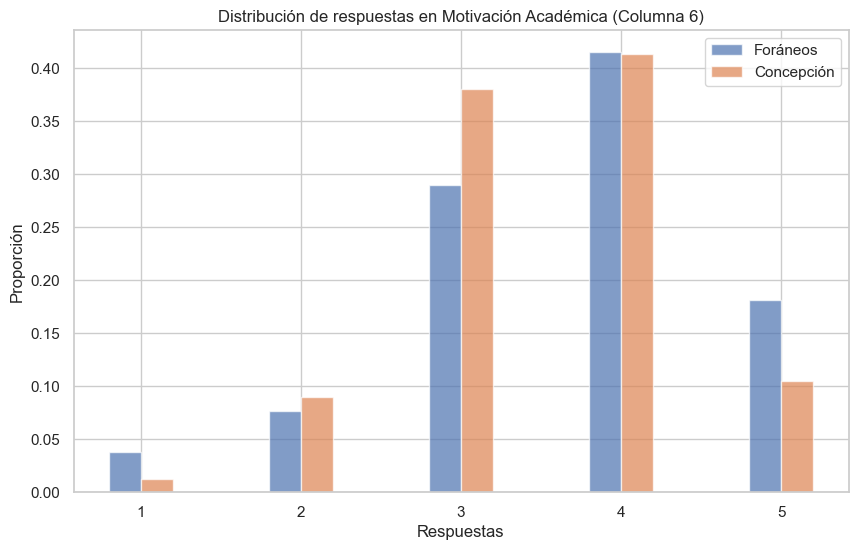

In [ ]:
# Nos enfocamos en las columnas 6 y 7, que parecen tener diferencias más notables.
# Pero como la columna 7 indíca la frecuencia de asistencia a clases, que puede estar influenciada por factores externos,
# nos centraremos en la columna 6 para un análisis más profundo.
# Analizamos la distribución de respuestas en la columna 6 para ambos grupos con un grafico de barras, usando proporciones de respuestas.
import matplotlib.pyplot as plt
# Función para graficar distribuciones
def graficar_distribucion_motivacion(columna, titulo):
    respuestas_foraneos = df_motivacion[df_motivacion[col_2].str.strip(' ') != 'Concepción'][columna].dropna().astype(float)
    respuestas_concepcion = df_motivacion[df_motivacion[col_2].str.strip(' ') == 'Concepción'][columna].dropna().astype(float)

    # Calculamos las proporciones
    proporciones_foraneos = respuestas_foraneos.value_counts(normalize=True).sort_index()
    proporciones_concepcion = respuestas_concepcion.value_counts(normalize=True).sort_index()

    # Graficamos
    plt.figure(figsize=(10, 6))
    plt.bar(proporciones_foraneos.index - 0.1, proporciones_foraneos.values, width=0.2, label='Foráneos', alpha=0.7)
    plt.bar(proporciones_concepcion.index + 0.1, proporciones_concepcion.values, width=0.2, label='Concepción', alpha=0.7)
    plt.xlabel('Respuestas')
    plt.ylabel('Proporción')
    plt.title(f'Distribución de respuestas en {titulo}')
    plt.xticks(sorted(set(proporciones_foraneos.index).union(set(proporciones_concepcion.index))))
    plt.legend()
    plt.show()
# Graficamos la distribución para la columna 6
graficar_distribucion_motivacion(col_6, 'Motivación Académica (Columna 6)')

In [85]:
# Ahora, nos enfocaremos en las columnas relacionadas con la autopercepción académica (columas 9 a 16).
# Todas las respuestas son en una escala de 1 a 5, donde 1 es "Totalmente en desacuerdo" y 5 es "Totalmente de acuerdo",
# dónde las asevraciones son positivas respecto a la autopercepción académica.
# Creamos un nuevo DataFrame que solo contenga las columnas de autopercepción y el origen del estudiante
columnas_autopercepcion = [col_9, col_10, col_11, col_12, col_13, col_14, col_15, col_16]
df_autopercepcion = df[[col_2] + columnas_autopercepcion].copy()
# Analizamos los promedios de autopercepción para ambos grupos
promedios_autopercepcion = {}
for col in columnas_autopercepcion:
    promedios_foraneos = df_autopercepcion[df_autopercepcion[col_2].str.strip(' ') != 'Concepción'][col].dropna().astype(float).mean()
    promedios_concepcion = df_autopercepcion[df_autopercepcion[col_2].str.strip(' ') == 'Concepción'][col].dropna().astype(float).mean()
    promedios_autopercepcion[col] = {
        'Foráneos': promedios_foraneos,
        'Concepción': promedios_concepcion
    }
# Imprimimos los resultados
print("\nPromedios de autopercepción académica por grupo:")
i = 9
for col, promedios in promedios_autopercepcion.items():
    print(f"Pregunta {i}: Foráneos = {promedios['Foráneos']:.2f}, Concepción = {promedios['Concepción']:.2f}")
    i += 1


Promedios de autopercepción académica por grupo:
Pregunta 9: Foráneos = 3.77, Concepción = 3.87
Pregunta 10: Foráneos = 3.65, Concepción = 3.68
Pregunta 11: Foráneos = 3.58, Concepción = 3.63
Pregunta 12: Foráneos = 3.39, Concepción = 3.36
Pregunta 13: Foráneos = 3.21, Concepción = 3.37
Pregunta 14: Foráneos = 3.76, Concepción = 3.83
Pregunta 15: Foráneos = 4.09, Concepción = 4.19
Pregunta 16: Foráneos = 2.93, Concepción = 3.14


In [ ]:
# Realizamos pruebas estadísticas para ver si las diferencias en autopercepción son significativas, imprimiendo sólo estas últimas.
i = 9
from scipy.stats import ttest_ind
for col in columnas_autopercepcion:
    motivacion_foraneos = df_autopercepcion[df_autopercepcion[col_2].str.strip(' ') != 'Concepción'][col].dropna().astype(float)
    motivacion_concepcion = df_autopercepcion[df_autopercepcion[col_2].str.strip(' ') == 'Concepción'][col].dropna().astype(float)
    t_stat, p_val = ttest_ind(motivacion_foraneos, motivacion_concepcion, equal_var=False)
    if p_val < 0.05:
        print(f"Diferencia significativa en la autopercepción académica entre estudiantes foráneos y de Concepción para {i}.")
    i += 1


Diferencia significativa en la autopercepción académica entre estudiantes foráneos y de Concepción para 13.
Diferencia significativa en la autopercepción académica entre estudiantes foráneos y de Concepción para 16.


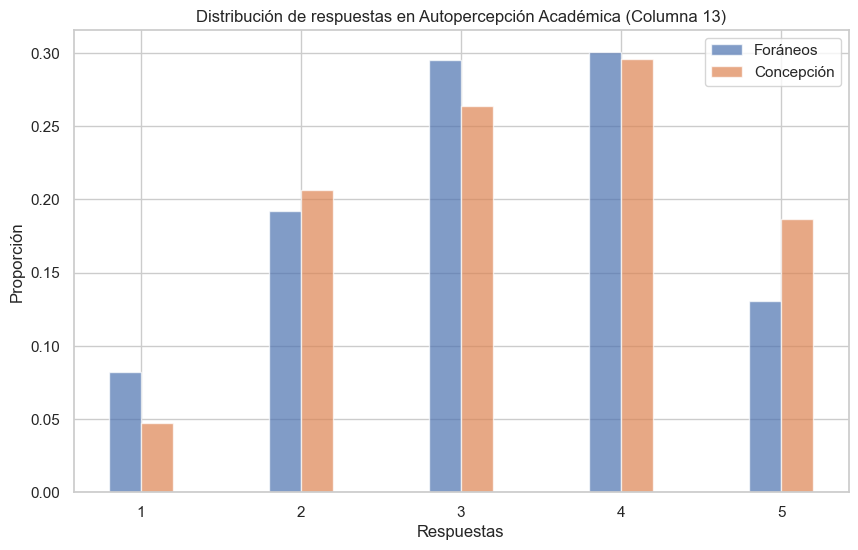

In [ ]:
# Nos enfocamos en la columna 13 y 16, que parecen tener diferencias más notables.
# Analizamos la distribución de respuestas en la columna 13 para ambos grupos con un grafico de barras, usando proporciones de respuestas.
# Realizamos una nueva función para graficar distribuciones
def graficar_distribucion_autopercepcion(columna, titulo):
    respuestas_foraneos = df_autopercepcion[df_autopercepcion[col_2].str.strip(' ') != 'Concepción'][columna].dropna().astype(float)
    respuestas_concepcion = df_autopercepcion[df_autopercepcion[col_2].str.strip(' ') == 'Concepción'][columna].dropna().astype(float)

    # Calculamos las proporciones
    proporciones_foraneos = respuestas_foraneos.value_counts(normalize=True).sort_index()
    proporciones_concepcion = respuestas_concepcion.value_counts(normalize=True).sort_index()

    # Graficamos
    plt.figure(figsize=(10, 6))
    plt.bar(proporciones_foraneos.index - 0.1, proporciones_foraneos.values, width=0.2, label='Foráneos', alpha=0.7)
    plt.bar(proporciones_concepcion.index + 0.1, proporciones_concepcion.values, width=0.2, label='Concepción', alpha=0.7)
    plt.xlabel('Respuestas')
    plt.ylabel('Proporción')
    plt.title(f'Distribución de respuestas en {titulo}')
    plt.xticks(sorted(set(proporciones_foraneos.index).union(set(proporciones_concepcion.index))))
    plt.legend()
    plt.show()
# Graficamos la distribución para la columna 13
graficar_distribucion_autopercepcion(col_13, 'Autopercepción Académica (Columna 13)')
# Observamos que ambos grupos muestran una distribución similar en la autopercepción académica,
# con una ligera tendencia a respuestas más altas entre los estudiantes de Concepción.

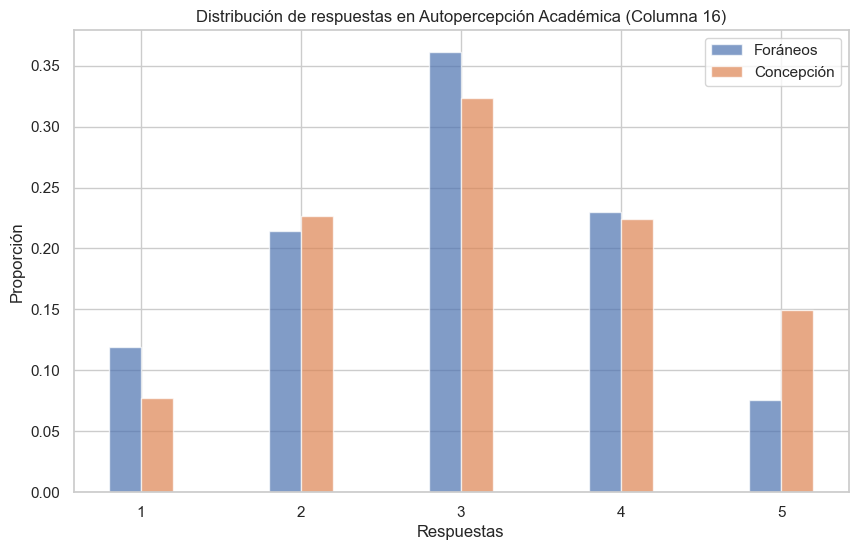

In [ ]:
# Probamos la columna 16
graficar_distribucion_autopercepcion(col_16, 'Autopercepción Académica (Columna 16)')

Observamos que ambos grupos muestran una distribución similar en la autopercepción académica,
con una ligera tendencia a respuestas más altas entre los estudiantes de Concepción.
Esto refuerza la idea de que la autopercepción académica no difiere drásticamente entre estudiantes foráneos y locales,
aunque factores individuales pueden influir en las respuestas.

In [ ]:
# Cómo las preguntas desde la columna 18 hasta la 72 también están en una escala de 1 a 5 desde 'Totalmente en desacuerdo' a 'Totalmente de acuerdo',
# podemos realizar un análisis similar para ver si hay diferencias significativas entre estudiantes foráneos y locales,
# para así poder encontrar diferencias en aspectos específicos de la experiencia académica y personal.
columnas_experiencia = df.columns[17:72]  # Columnas 18 a 72 (índices 17 a 71)
df_experiencia = df[[col_2] + list(columnas_experiencia)].copy()
# Analizamos los promedios de experiencia para ambos grupos
promedios_experiencia = {}
for col in columnas_experiencia:
    promedios_foraneos = df_experiencia[df_experiencia[col_2].str.strip(' ') != 'Concepción'][col].dropna().astype(float).mean()
    promedios_concepcion = df_experiencia[df_experiencia[col_2].str.strip(' ') == 'Concepción'][col].dropna().astype(float).mean()
    promedios_experiencia[col] = {
        'Foráneos': promedios_foraneos,
        'Concepción': promedios_concepcion
    }

# Realizamos pruebas estadísticas para ver si las diferencias en experiencia son significativas, añadiendo el
# número de columna para facilitar la identificación.
diferencias_significativas = []
i = 18
for col in columnas_experiencia:
    experiencia_foraneos = df_experiencia[df_experiencia[col_2].str.strip(' ') != 'Concepción'][col].dropna().astype(float)
    experiencia_concepcion = df_experiencia[df_experiencia[col_2].str.strip(' ') == 'Concepción'][col].dropna().astype(float)
    t_stat, p_val = ttest_ind(experiencia_foraneos, experiencia_concepcion, equal_var=False)
    if p_val < 0.05:
        diferencias_significativas.append((col, i))
    i += 1

In [79]:
# Extraemos las columnas con diferencias significativas para un análisis más profundo
columnas_significativas = [col for col, _ in diferencias_significativas]
df_significativas = df_experiencia[[col_2] + columnas_significativas].copy()

# Calculamos una respuesta de sí o no para el general, si la respuesta es mayor o igual a 4 (de acuerdo o totalmente de acuerdo)
# diferenciando según el origen del estudiante
respuestas_generales = {}
for col in columnas_significativas:
    respuestas_foraneos = df_significativas[df_significativas[col_2].str.strip(' ') != 'Concepción'][col].dropna().astype(float)
    respuestas_concepcion = df_significativas[df_significativas[col_2].str.strip(' ') == 'Concepción'][col].dropna().astype(float)

    proporcion_si_foraneos = (respuestas_foraneos >= 4).mean() * 100
    proporcion_si_concepcion = (respuestas_concepcion >= 4).mean() * 100

    respuestas_generales[col] = {
        'Foráneos': proporcion_si_foraneos,
        'Concepción': proporcion_si_concepcion
    }

# Vemos si el porcentaje de respuestas positivas es mayor en estudiantes de Concepción o foráneos
mayor_en_concepcion = 0
mayor_en_foraneos = 0
for col, proporciones in respuestas_generales.items():
    if proporciones['Concepción'] > proporciones['Foráneos']:
        mayor_en_concepcion += 1
    else:
        mayor_en_foraneos += 1
print(f"\nNúmero de columnas con mayor proporción de respuestas positivas en estudiantes de Concepción: {mayor_en_concepcion}")
print(f"Número de columnas con mayor proporción de respuestas positivas en estudiantes foráneos: {mayor_en_foraneos}")


Número de columnas con mayor proporción de respuestas positivas en estudiantes de Concepción: 0
Número de columnas con mayor proporción de respuestas positivas en estudiantes foráneos: 31


Sebastián Cardenas

Denisse

Estefanía

Constanza

Felipe